PCA: 

First we will take a small data set to explain the concept of Rank of a matrix, eigenvalues, eigenvectors etc

In [1]:
import pandas as pd
import numpy as np

# Lets take the random number under the column of age, hight and weight for 3 kids

data = pd.DataFrame({'age' : [1,2,3] , 'height' : [10,20,30], 'weight': [20, 32, 52]})

data.head()

,age,height,weight
0,1,10,20
1,2,20,32
2,3,30,52


In this data I can see some linear relationship between age and hight (height = 2*age)

Lets assume that we have to predict the weight (Y - target variable) based on age and height.

Thus the linear equation for weight will be Y = (a+s.r)*age + (b+s.r)*height + constant.

Lets see how PCA can help us to reduce the number of dimensions.

In [17]:
# How to find the number of related coulmns

evalues, evectors = np.linalg.eig(data)

print(evalues)

[7.20000000e+01 7.89971289e-16 1.00000000e+00]


In [14]:
print(evectors)

[[-2.99074302e-01 -9.95037190e-01  8.01783726e-01]
 [-5.08426314e-01  9.95037190e-02 -5.34522484e-01]
 [-8.07500616e-01 -1.19558943e-16  2.67261242e-01]]


In [18]:
# Calculating the pcs 

pcs = np.dot(data, evectors)

pcs

array([[-2.15333498e+01, -1.72504504e-15,  8.01783726e-01],
       [-3.66066946e+01, -2.49361854e-15, -5.34522484e-01],
       [-5.81400444e+01, -4.44070818e-15,  2.67261242e-01]])

In [19]:
# Variance explained by PCs

pc_df = pd.DataFrame(pcs)

pc_df.var()

0    3.384902e+02
1    1.959448e-30
2    4.523810e-01
dtype: float64

In [27]:
# Percentage of variance explained by each of the independent variable i.e age and height

total_var = pc_df.var().sum()

# Variance explained by each PC

PC_var = pd.DataFrame(pc_df.var())

PC_var

# Percentage variance

PC_var['Percentage'] = (round((PC_var[0] / total_var),3))*100

PC_var

,0,Percentage
0,3.384902e+02,99.9
1,1.959448e-30,0.0
2,4.523810e-01,0.1


Lets do a PCA on some real data. We will use Iris data set for this purpose

In [5]:
# Importing the libraries
from pydataset import data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# Importing data set

iris = data('iris')

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
# Species is our target variable and remaining are our input variabl. Lets split them as Y and X

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

Y = iris[['Species']]

print('Dimension of X: ', X.shape)
print('Dimension of Y: ', Y.shape)

Dimension of X:  (150, 4)
Dimension of Y:  (150, 1)


We will divide this hands on in 2 parts: 1) we will see how to calculate the PCs on my input variable and 2) We will build a one model using all input variable and one model using only few PCs. This will help us to compaire if using less number of dimesions I can still build the model with same accuracy. 

Part 1: We will see how to calculate the PCs for Input variable

Step 1: PCA  give better result by standardizing the data. This can be done either using corelation matrix or scaling.

NOTE: Scaling or Standardization is the process of normalise the data within a particular range. A Scaled or Standardized data will have a mean of 0 and SD of 1. Standardized data also helps in speeding up the calculations in an algorithm.

In [8]:
# Step 1: Scaling the data

# Creating the scaling object 

sc = StandardScaler()

# Fitting the object on our data

X_scaled = sc.fit_transform(X)

#X_scaled

# We can use inverse_transform to get our data back in original form.

In [9]:
# Step 2: Creating the principal components

# Creating a PCA object with n_components defining how many PCS we want

pca = PCA(n_components=4)

# Fitting the PC object on our scaled data

pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# Step 3: We will ckeck the amount of variance that each PC explains

var= pca.explained_variance_ratio_

var

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [9]:
# We can also calculate Cumulative Variance explains by PCs

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var1

array([ 72.96,  95.81,  99.48, 100.  ])

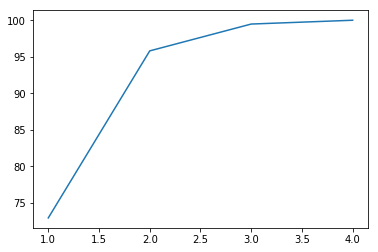

In [10]:
# Ploting the Cumulative using scree plot

X_axis = [1,2,3,4]

Y_axis = var1

plt.plot(X_axis, Y_axis)

Points to Remember: 

1) PCA is used to overcome features redundancy in a data set.
2) These features are low dimensional in nature.
3) These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
4) These components aim to capture as much information as possible with high explained variance.
5) The first component has the highest variance followed by second, third and so on.
6) The components must be uncorrelated (remember orthogonal direction ? ).
7) Standardization becomes extremely important when the predictors are measured in different units.
8) PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
9) PCA is applied on a data set with numeric variables.
10) PCA is a tool which helps to produce better visualizations of high dimensional data.

Part 2: We will build a classification model using all features first and check the model accuracy. Then we will build the model using only PC1 and PC2 as both of them present 95% variance in data. We will compaire the accuracy of two models.

In [10]:
# Step 1: Spliting the data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(120, 30, 120, 30)

In [11]:
# Step 2: We will Standarized our input variable training and test data i.e X_train and X_test

# Creating the Standarized object 

sc1 = StandardScaler()

# Fitting the same on training and test data

X_train1 = sc1.fit_transform(X_train)  

X_test1 = sc1.transform(X_test)  

# NOTE: Always use transform with test and fit_transform with training set

In [12]:
# Step 3: Creating the logistic Regression model with all the input features

from sklearn.ensemble import RandomForestClassifier

# Clearing the logistic regression object
classifier = RandomForestClassifier(random_state = 0)

# Fitting the object on input training and output training data
Model1 = classifier.fit(X_train1, Y_train)

Model1


C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
# Step 4: Predict Results from Model on test data

Y_test['Pred_species'] = classifier.predict(X_test1)

Y_test.head()

C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Species,Pred_species
115,virginica,virginica
63,versicolor,versicolor
34,setosa,setosa
108,virginica,virginica
8,setosa,setosa


In [14]:
# Step 5: Checking the accuracy by confusion matrix

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test['Species'], Y_test['Pred_species'])  

cm

accuracy = accuracy_score(Y_test[['Species']], Y_test[['Pred_species']])
accuracy

0.9666666666666667

Now we will build the same model PC1 and PC2 as the input varriable.

In [15]:
# Step 1: We will fit PC1 and PC2 on our scaled training and text data

# Creating a PCA object with n_components defining how many PCS we want

pca = PCA(n_components=2)

# Fitting the PC object on our scaled data

X_train_PC = pca.fit_transform(X_train1)  

X_test_PC = pca.transform(X_test1)  

In [16]:
# Step 2: Creating the logistic Regression model with all the input features

from sklearn.ensemble import RandomForestClassifier

# Clearing the logistic regression object
classifier_pc = RandomForestClassifier(random_state = 0)

# Fitting the object on input training and output training data
Model2 = classifier_pc.fit(X_train_PC, Y_train)

Model2

C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
# Step 3: Predict Results from Model on test data

Y_test['Pred_species_using_PC'] = classifier_pc.predict(X_test_PC)

Y_test.head()

C:\Users\amitc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Species,Pred_species,Pred_species_using_PC
115,virginica,virginica,virginica
63,versicolor,versicolor,versicolor
34,setosa,setosa,setosa
108,virginica,virginica,virginica
8,setosa,setosa,setosa


In [18]:
# Step 4: Checking the accuracy by confusion matrix

PC_cm = confusion_matrix(Y_test['Species'], Y_test['Pred_species_using_PC'])  

PC_cm

PC_accuracy = accuracy_score(Y_test[['Species']], Y_test[['Pred_species_using_PC']])

PC_accuracy

0.9

In [19]:
# Lets predict the species for below data

val_data = pd.DataFrame({'Sepal.Length' : [4.3, 5.8], 'Sepal.Width' : [3.2, 4.8], 'Petal.Length' : [1.2, 2.6], 
                        'Petal.Width' : [0.3, 0.8]})

val_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,4.3,3.2,1.2,0.3
1,5.8,4.8,2.6,0.8


In [20]:
# Transforming the val data

val_data_scaled = sc1.transform(val_data)

# Fitting the PCs on Val data

val_data_PC = pca.transform(val_data_scaled)

# Prediting using the model

val_pred = classifier_pc.predict(val_data_PC)

val_pred


array(['setosa', 'setosa'], dtype=object)